In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from tabulate import tabulate

In [2]:
data = pd.read_excel(r'flight_df.xlsx')
pd.set_option('display.max_columns', None)


In [3]:
data.head()

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Year,Return_Time,Return_Cities,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
0,0,15/5/2021,15.0,Saturday,May,2021.0,05:25–21:45,AMD Ahmedabad,SpiceJet,25/5/2021,25.0,Tuesday,May,2021.0,06:25–23:55,MAA Chennai,SpiceJet,16h 20m,17h 30m,1 stop,1 stop,BOM,BOM,6125.0,20210410-1142,best
1,1,15/5/2021,15.0,Saturday,May,2021.0,04:15–09:20,AMD Ahmedabad,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,09:20–13:55,MAA Chennai,IndiGo,5h 05m,4h 35m,1 stop,1 stop,BLR,BLR,6686.0,20210410-1142,best
2,2,15/5/2021,15.0,Saturday,May,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,09:00–14:20,MAA Chennai,IndiGo,4h 30m,5h 20m,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best
3,3,15/5/2021,15.0,Saturday,May,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,14:05–19:35,MAA Chennai,IndiGo,4h 30m,5h 30m,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best
4,4,15/5/2021,15.0,Saturday,May,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,25/5/2021,25.0,Tuesday,May,2021.0,13:15–18:55,MAA Chennai,IndiGo,4h 30m,5h 40m,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1157 non-null   int64  
 1   Out_Date             1113 non-null   object 
 2   Out_Day              1113 non-null   float64
 3   Out_Weekday          1113 non-null   object 
 4   Out_Month            1113 non-null   object 
 5   out_Year             1113 non-null   float64
 6   Out_Time             1157 non-null   object 
 7   Out_Cities           1157 non-null   object 
 8   Out_Airline          1157 non-null   object 
 9   Return_Date          1104 non-null   object 
 10  Return_Day           1104 non-null   float64
 11  Return_Weekday       1104 non-null   object 
 12  Return_Month         1104 non-null   object 
 13  Return_Year          1104 non-null   float64
 14  Return_Time          1157 non-null   object 
 15  Return_Cities        1157 non-null   o

In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

Unnamed: 0             0
Out_Date               0
Out_Day                0
Out_Weekday            0
Out_Month              0
out_Year               0
Out_Time               0
Out_Cities             0
Out_Airline            0
Return_Date            0
Return_Day             0
Return_Weekday         0
Return_Month           0
Return_Year            0
Return_Time            0
Return_Cities          0
Return_Airline         0
Out_Travel_Time        0
Return_Travel_Time     0
Out_Journey_Type       0
Return_Journey_Type    0
Out_Stop_Cities        0
Return_Stop_Cities     0
Price                  0
timestamp              0
sort                   0
dtype: int64

In [7]:
data['Out_Weekday'].unique()

array(['Saturday', 'Sunday', 'Thursday', 'Friday', 'Wednesday', 'Monday',
       'Tuesday'], dtype=object)

In [8]:
data['Out_Month'].unique()

array(['May', 'July', 'September', 'August', 'June', 'April', 'October'],
      dtype=object)

In [9]:
data['Return_Weekday'].unique()

array(['Tuesday', 'Saturday', 'Sunday', 'Thursday', 'Monday', 'Wednesday',
       'Friday'], dtype=object)

In [10]:
data['Return_Month'].unique()

array(['May', 'August', 'September', 'July', 'June', 'April', 'October'],
      dtype=object)

In [11]:
data['Out_Date'] = pd.to_datetime(data.Out_Date, format = "%d/%m/%Y")     
data['Return_Date'] = pd.to_datetime(data.Return_Date, format = "%d/%m/%Y") 

In [12]:
from sklearn.preprocessing import LabelEncoder

data['Out_Date'] = pd.to_datetime(data.Out_Date  , format = "%d").dt.day

le = LabelEncoder()
data['Out_Weekday'] = le.fit_transform(data['Out_Weekday'])
data['Out_Month'] = le.fit_transform(data['Out_Month'])


data['Return_Day'] = pd.to_datetime(data.Return_Date  , format = "%d").dt.day

data['Return_Weekday'] = le.fit_transform(data['Return_Weekday'])
data['Return_Month'] = le.fit_transform(data['Return_Month'])



In [14]:
data.head()

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Year,Return_Time,Return_Cities,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
0,0,15,15.0,2,4,2021.0,05:25–21:45,AMD Ahmedabad,SpiceJet,2021-05-25,25,5,4,2021.0,06:25–23:55,MAA Chennai,SpiceJet,16h 20m,17h 30m,1 stop,1 stop,BOM,BOM,6125.0,20210410-1142,best
1,1,15,15.0,2,4,2021.0,04:15–09:20,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,09:20–13:55,MAA Chennai,IndiGo,5h 05m,4h 35m,1 stop,1 stop,BLR,BLR,6686.0,20210410-1142,best
2,2,15,15.0,2,4,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,09:00–14:20,MAA Chennai,IndiGo,4h 30m,5h 20m,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best
3,3,15,15.0,2,4,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,14:05–19:35,MAA Chennai,IndiGo,4h 30m,5h 30m,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best
4,4,15,15.0,2,4,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,13:15–18:55,MAA Chennai,IndiGo,4h 30m,5h 40m,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best


In [15]:
duration = list(data["Out_Travel_Time"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          
            
Out_Hours = []
Out_Mins = []
for i in range(len(duration)):
    Out_Hours.append(int(duration[i].split(sep = "h")[0]))   
    Out_Mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [16]:
data["Out_Hours"] = Out_Hours
data["Out_Mins"] = Out_Mins

In [17]:
data.drop(["Out_Travel_Time"], axis = 1, inplace = True)

In [18]:

duration_1 = list(data["Return_Travel_Time"])

for i in range(len(duration_1)):
    if len(duration_1[i].split()) != 2:   
        if "h" in duration_1[i]:
            duration_1[i] = duration_1[i].strip() + " 0m"  
        else:
            duration_1[i] = "0h " + duration_1[i]          
            
Return_Hours = []
Return_Mins = []
for i in range(len(duration_1)):
    Return_Hours.append(int(duration_1[i].split(sep = "h")[0]))  
    Return_Mins.append(int(duration_1[i].split(sep = "m")[0].split()[-1]))   

In [19]:
data["Return_Hours"] = Return_Hours
data["Return_Mins"] = Return_Mins

In [20]:
data.drop(["Return_Travel_Time"], axis = 1, inplace = True)

In [22]:
data['sort'].unique()

array(['best', 'cheap', 'fast', 'Best', 'Cheap'], dtype=object)

In [23]:
data['sort'] = data['sort'].replace(['Best','Cheap'],['best','cheap'])

In [24]:
data['sort'].unique()

array(['best', 'cheap', 'fast'], dtype=object)

In [25]:
data['sort'] = le.fit_transform(data['sort'])

In [21]:
data.head()

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Year,Return_Time,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins
0,0,15,15.0,2,4,2021.0,05:25–21:45,AMD Ahmedabad,SpiceJet,2021-05-25,25,5,4,2021.0,06:25–23:55,MAA Chennai,SpiceJet,1 stop,1 stop,BOM,BOM,6125.0,20210410-1142,best,16,20,17,30
1,1,15,15.0,2,4,2021.0,04:15–09:20,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,09:20–13:55,MAA Chennai,IndiGo,1 stop,1 stop,BLR,BLR,6686.0,20210410-1142,best,5,5,4,35
2,2,15,15.0,2,4,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,09:00–14:20,MAA Chennai,IndiGo,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best,4,30,5,20
3,3,15,15.0,2,4,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,14:05–19:35,MAA Chennai,IndiGo,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best,4,30,5,30
4,4,15,15.0,2,4,2021.0,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,2021.0,13:15–18:55,MAA Chennai,IndiGo,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,best,4,30,5,40


In [26]:
data['out_Year'].unique()


array([2021.])

In [27]:
data['Return_Year'].unique()

array([2021.])

In [28]:
data.drop(["out_Year"], axis = 1, inplace = True)
data.drop(["Return_Year"], axis = 1, inplace = True)

In [29]:
data.head()

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Time,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins
0,0,15,15.0,2,4,05:25–21:45,AMD Ahmedabad,SpiceJet,2021-05-25,25,5,4,06:25–23:55,MAA Chennai,SpiceJet,1 stop,1 stop,BOM,BOM,6125.0,20210410-1142,0,16,20,17,30
1,1,15,15.0,2,4,04:15–09:20,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,09:20–13:55,MAA Chennai,IndiGo,1 stop,1 stop,BLR,BLR,6686.0,20210410-1142,0,5,5,4,35
2,2,15,15.0,2,4,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,09:00–14:20,MAA Chennai,IndiGo,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,0,4,30,5,20
3,3,15,15.0,2,4,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,14:05–19:35,MAA Chennai,IndiGo,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,0,4,30,5,30
4,4,15,15.0,2,4,18:15–22:45,AMD Ahmedabad,IndiGo,2021-05-25,25,5,4,13:15–18:55,MAA Chennai,IndiGo,1 stop,1 stop,BOM,BOM,6686.0,20210410-1142,0,4,30,5,40


In [30]:
data['O_T_1'] = data['Out_Time'].apply(lambda x: x.split('–')[0])

In [31]:
data['O_T_1'].head()

0    05:25
1    04:15
2    18:15
3    18:15
4    18:15
Name: O_T_1, dtype: object

In [32]:
data['O_T_2'] = data['Out_Time'].apply(lambda x: x.split('–')[1])

In [33]:
data['O_T_2'].head()

0    21:45
1    09:20
2    22:45
3    22:45
4    22:45
Name: O_T_2, dtype: object

In [34]:
data['R_T_1'] = data['Return_Time'].apply(lambda x: x.split('–')[0])

In [35]:
data['R_T_1'].head()

0    06:25
1    09:20
2    09:00
3    14:05
4    13:15
Name: R_T_1, dtype: object

In [36]:
data['R_T_2'] = data['Return_Time'].apply(lambda x: x.split('–')[1])

In [37]:
data['R_T_2'].head()

0    23:55
1    13:55
2    14:20
3    19:35
4    18:55
Name: R_T_2, dtype: object

In [38]:
data['Out_Journey_Type'].unique()

array(['1 stop', 'direct'], dtype=object)

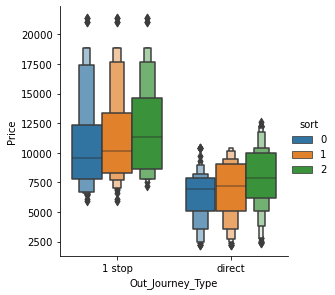

In [39]:
sns.catplot(x = "Out_Journey_Type", y = "Price", data = data, kind="boxen",hue = 'sort', height = 4, aspect = 1)

In [40]:
data['Out_Journey_Type'] = data['Out_Journey_Type'].replace(['1 stop', 'direct'],[1,0])

In [41]:
data['Return_Journey_Type'].unique()

array(['1 stop', 'direct', '2 stops', '3 stops'], dtype=object)

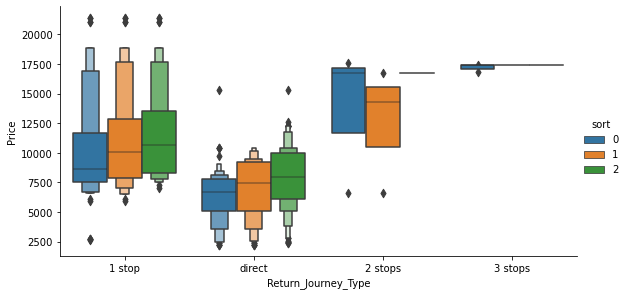

In [42]:
sns.catplot(x = "Return_Journey_Type", y ="Price", data = data, kind="boxen",hue = 'sort', height = 4, aspect = 2)

In [43]:
data['Return_Journey_Type'] = data['Return_Journey_Type'].replace(['1 stop', 'direct', '2 stops', '3 stops'],[1,0,2,3])

In [44]:
data.Out_Cities.unique()

array(['AMD Ahmedabad', '+1 AMD', 'BLR Bengaluru', 'BOM Chhatrapati',
       '+1 BOM', 'CCU Netaji', '+1 CCU', '+1 MAA', 'MAA Chennai',
       'DEL Indira', '+1 DEL', 'GAU Borjhar', '+1 GAU', 'IXL Leh',
       'IXR Ranchi', '+1 IXR', 'JAI Sanganeer', 'CNN Kannur', '+1 CNN',
       'CCJ Kozhikode', '+1 CCJ', 'SHL Shillong', 'VNS Varanasi',
       '+1 VNS'], dtype=object)

In [45]:
data['Out_Cities'] = data['Out_Cities'].replace(['AMD Ahmedabad','+1 AMD'],'AMD')
data['Out_Cities'] = data['Out_Cities'].replace(['BLR Bengaluru'],'BLR')
data['Out_Cities'] = data['Out_Cities'].replace(['BOM Chhatrapati','+1 BOM'],'BOM')

data['Out_Cities'] = data['Out_Cities'].replace(['CCU Netaji', '+1 CCU'],'CCU')
data['Out_Cities'] = data['Out_Cities'].replace(['+1 MAA', 'MAA Chennai'],'MAA')
data['Out_Cities'] = data['Out_Cities'].replace(['DEL Indira', '+1 DEL'],'DEL')

data['Out_Cities'] = data['Out_Cities'].replace(['GAU Borjhar', '+1 GAU'],'GAU')
data['Out_Cities'] = data['Out_Cities'].replace(['IXL Leh'],'IXL')
data['Out_Cities'] = data['Out_Cities'].replace(['IXR Ranchi', '+1 IXR'],'IXR')

data['Out_Cities'] = data['Out_Cities'].replace(['JAI Sanganeer'],'JAI')
data['Out_Cities'] = data['Out_Cities'].replace(['CNN Kannur', '+1 CNN'],'CNN')
data['Out_Cities'] = data['Out_Cities'].replace(['CCJ Kozhikode', '+1 CCJ'],'CCJ')

data['Out_Cities'] = data['Out_Cities'].replace(['SHL Shillong'],'SHL')
data['Out_Cities'] = data['Out_Cities'].replace(['VNS Varanasi','+1 VNS'],'VNS')

In [46]:
data.Out_Cities.unique()

array(['AMD', 'BLR', 'BOM', 'CCU', 'MAA', 'DEL', 'GAU', 'IXL', 'IXR',
       'JAI', 'CNN', 'CCJ', 'SHL', 'VNS'], dtype=object)

In [47]:
data.Return_Cities.unique()

array(['MAA Chennai', '+1 MAA', '+1 STV', 'STV Surat', 'ATQ Sri',
       '+1 ATQ', 'DEL Indira', '+1 DEL', 'GAU Borjhar', 'AGX Agatti',
       'BLR Bengaluru', '+1 BLR', 'HYD Rajiv', '+1 HYD', '+1 IXE',
       'IXE Bajpe', 'GOP Gorakhpur', 'PAT Patna', '+1 PAT',
       'CJB Peelamedu', 'VGA Vijayawada', '+1 VGA', '+1 AMD',
       'LKO Amausi', '+1 LKO'], dtype=object)

In [48]:
data['Return_Cities'] = data['Return_Cities'].replace(['MAA Chennai', '+1 MAA'],'MAA')
data['Return_Cities'] = data['Return_Cities'].replace(['+1 STV', 'STV Surat'],'STV')
data['Return_Cities'] = data['Return_Cities'].replace(['ATQ Sri','+1 ATQ'],'ATQ')

data['Return_Cities'] = data['Return_Cities'].replace(['DEL Indira', '+1 DEL'],'DEL')
data['Return_Cities'] = data['Return_Cities'].replace(['GAU Borjhar'],'GAU')
data['Return_Cities'] = data['Return_Cities'].replace(['AGX Agatti'],'AGX')

data['Return_Cities'] = data['Return_Cities'].replace(['BLR Bengaluru', '+1 BLR'],'BLR')
data['Return_Cities'] = data['Return_Cities'].replace(['HYD Rajiv', '+1 HYD'],'HYD')
data['Return_Cities'] = data['Return_Cities'].replace(['+1 IXE', 'IXE Bajpe'],'IXE')

data['Return_Cities'] = data['Return_Cities'].replace(['GOP Gorakhpur'],'GOP')
data['Return_Cities'] = data['Return_Cities'].replace(['PAT Patna', '+1 PAT'],'PAT')
data['Return_Cities'] = data['Return_Cities'].replace(['CJB Peelamedu'],'CJB')

data['Return_Cities'] = data['Return_Cities'].replace(['VGA Vijayawada', '+1 VGA'],'VGA')
data['Return_Cities'] = data['Return_Cities'].replace(['+1 AMD'],'AMD')
data['Return_Cities'] = data['Return_Cities'].replace(['LKO Amausi', '+1 LKO'],'LKO')

In [49]:
data.Return_Cities.unique()

array(['MAA', 'STV', 'ATQ', 'DEL', 'GAU', 'AGX', 'BLR', 'HYD', 'IXE',
       'GOP', 'PAT', 'CJB', 'VGA', 'AMD', 'LKO'], dtype=object)

In [50]:
data.head()

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Time,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins,O_T_1,O_T_2,R_T_1,R_T_2
0,0,15,15.0,2,4,05:25–21:45,AMD,SpiceJet,2021-05-25,25,5,4,06:25–23:55,MAA,SpiceJet,1,1,BOM,BOM,6125.0,20210410-1142,0,16,20,17,30,05:25,21:45,06:25,23:55
1,1,15,15.0,2,4,04:15–09:20,AMD,IndiGo,2021-05-25,25,5,4,09:20–13:55,MAA,IndiGo,1,1,BLR,BLR,6686.0,20210410-1142,0,5,5,4,35,04:15,09:20,09:20,13:55
2,2,15,15.0,2,4,18:15–22:45,AMD,IndiGo,2021-05-25,25,5,4,09:00–14:20,MAA,IndiGo,1,1,BOM,BOM,6686.0,20210410-1142,0,4,30,5,20,18:15,22:45,09:00,14:20
3,3,15,15.0,2,4,18:15–22:45,AMD,IndiGo,2021-05-25,25,5,4,14:05–19:35,MAA,IndiGo,1,1,BOM,BOM,6686.0,20210410-1142,0,4,30,5,30,18:15,22:45,14:05,19:35
4,4,15,15.0,2,4,18:15–22:45,AMD,IndiGo,2021-05-25,25,5,4,13:15–18:55,MAA,IndiGo,1,1,BOM,BOM,6686.0,20210410-1142,0,4,30,5,40,18:15,22:45,13:15,18:55


In [51]:
data['Out_Stop_Cities'].unique()

array(['BOM', 'BLR', 'HYD', 0, 'GOI', 'MAA', 'DEL', 'VTZ', 'COK', 'RDP',
       'NAG', 'IXU', 'LKO', 'CCU'], dtype=object)

In [52]:
data['Out_Stop_Cities'] = data['Out_Stop_Cities'].replace([0],'Non_Stop')

In [53]:
data[data['Out_Stop_Cities']=='Non_Stop']

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Time,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins,O_T_1,O_T_2,R_T_1,R_T_2
17,17,15,15.0,2,4,22:55–01:10,AMD,GoAir,2021-05-25,25,5,4,06:30–08:45,MAA,GoAir,0,0,Non_Stop,0,9359.0,20210410-1139,1,2,15,2,15,22:55,01:10,06:30,08:45
18,18,15,15.0,2,4,22:55–01:10,AMD,GoAir,2021-05-22,22,2,4,06:30–08:45,MAA,GoAir,0,0,Non_Stop,0,9694.0,20210410-1139,1,2,15,2,15,22:55,01:10,06:30,08:45
19,19,15,15.0,2,4,22:55–01:10,AMD,GoAir,2021-05-23,23,3,4,15:15–17:30,MAA,GoAir,0,0,Non_Stop,0,9694.0,20210410-1139,1,2,15,2,15,22:55,01:10,15:15,17:30
20,20,16,16.0,3,4,22:55–01:10,AMD,GoAir,2021-05-27,27,4,4,06:30–08:45,MAA,GoAir,0,0,Non_Stop,0,10448.0,20210410-1139,1,2,15,2,15,22:55,01:10,06:30,08:45
21,21,13,13.0,4,4,22:55–01:10,AMD,GoAir,2021-05-23,23,3,4,15:15–17:30,MAA,GoAir,0,0,Non_Stop,0,10448.0,20210410-1139,1,2,15,2,15,22:55,01:10,15:15,17:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,881,28,28.0,1,3,06:50–08:05,CCU,IndiGo,2021-07-02,2,0,2,13:20–14:20,PAT,IndiGo,0,0,Non_Stop,0,6336.0,20210410-1116,0,1,15,1,0,06:50,08:05,13:20,14:20
883,883,28,28.0,1,3,16:30–17:45,CCU,IndiGo,2021-07-02,2,0,2,18:20–19:50,PAT,IndiGo,0,0,Non_Stop,0,6289.0,20210410-1113,1,1,15,1,30,16:30,17:45,18:20,19:50
884,884,28,28.0,1,3,06:50–08:05,CCU,IndiGo,2021-07-02,2,0,2,13:20–14:20,PAT,IndiGo,0,0,Non_Stop,0,6336.0,20210410-1113,1,1,15,1,0,06:50,08:05,13:20,14:20
886,886,28,28.0,1,3,16:30–17:45,CCU,IndiGo,2021-07-02,2,0,2,18:20–19:50,PAT,IndiGo,0,0,Non_Stop,0,6289.0,20210410-1118,2,1,15,1,30,16:30,17:45,18:20,19:50


In [54]:
data['Return_Stop_Cities'].unique()

array(['BOM', 'BLR', 'HYD', 0, 'GOI', 'MAA', 'DEL', 'VTZ', 'COK', 'RDP',
       'NAG', 'IXU', 'LKO', 'CCU'], dtype=object)

In [55]:
data['Return_Stop_Cities']= data['Return_Stop_Cities'].replace([0],'Non_Stop')

In [56]:
data[data['Return_Stop_Cities']=='Non_Stop']

,Unnamed: 0,Out_Date,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,Return_Weekday,Return_Month,Return_Time,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins,O_T_1,O_T_2,R_T_1,R_T_2
17,17,15,15.0,2,4,22:55–01:10,AMD,GoAir,2021-05-25,25,5,4,06:30–08:45,MAA,GoAir,0,0,Non_Stop,Non_Stop,9359.0,20210410-1139,1,2,15,2,15,22:55,01:10,06:30,08:45
18,18,15,15.0,2,4,22:55–01:10,AMD,GoAir,2021-05-22,22,2,4,06:30–08:45,MAA,GoAir,0,0,Non_Stop,Non_Stop,9694.0,20210410-1139,1,2,15,2,15,22:55,01:10,06:30,08:45
19,19,15,15.0,2,4,22:55–01:10,AMD,GoAir,2021-05-23,23,3,4,15:15–17:30,MAA,GoAir,0,0,Non_Stop,Non_Stop,9694.0,20210410-1139,1,2,15,2,15,22:55,01:10,15:15,17:30
20,20,16,16.0,3,4,22:55–01:10,AMD,GoAir,2021-05-27,27,4,4,06:30–08:45,MAA,GoAir,0,0,Non_Stop,Non_Stop,10448.0,20210410-1139,1,2,15,2,15,22:55,01:10,06:30,08:45
21,21,13,13.0,4,4,22:55–01:10,AMD,GoAir,2021-05-23,23,3,4,15:15–17:30,MAA,GoAir,0,0,Non_Stop,Non_Stop,10448.0,20210410-1139,1,2,15,2,15,22:55,01:10,15:15,17:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,881,28,28.0,1,3,06:50–08:05,CCU,IndiGo,2021-07-02,2,0,2,13:20–14:20,PAT,IndiGo,0,0,Non_Stop,Non_Stop,6336.0,20210410-1116,0,1,15,1,0,06:50,08:05,13:20,14:20
883,883,28,28.0,1,3,16:30–17:45,CCU,IndiGo,2021-07-02,2,0,2,18:20–19:50,PAT,IndiGo,0,0,Non_Stop,Non_Stop,6289.0,20210410-1113,1,1,15,1,30,16:30,17:45,18:20,19:50
884,884,28,28.0,1,3,06:50–08:05,CCU,IndiGo,2021-07-02,2,0,2,13:20–14:20,PAT,IndiGo,0,0,Non_Stop,Non_Stop,6336.0,20210410-1113,1,1,15,1,0,06:50,08:05,13:20,14:20
886,886,28,28.0,1,3,16:30–17:45,CCU,IndiGo,2021-07-02,2,0,2,18:20–19:50,PAT,IndiGo,0,0,Non_Stop,Non_Stop,6289.0,20210410-1118,2,1,15,1,30,16:30,17:45,18:20,19:50


In [57]:
data.groupby(['Out_Date','Out_Day']).size()

Out_Date  Out_Day
1         1.0        187
2         2.0        163
3         3.0         24
4         4.0         34
5         5.0         15
7         7.0         13
8         8.0         13
9         9.0         41
10        10.0        45
11        11.0        46
12        12.0        66
13        13.0        19
14        14.0        17
15        15.0        57
16        16.0        15
18        18.0         3
19        19.0         3
20        20.0         4
21        21.0        34
22        22.0        42
23        23.0        14
24        24.0        61
25        25.0         9
26        26.0         3
27        27.0        30
28        28.0        32
29        29.0        80
30        30.0        27
31        31.0         7
dtype: int64

In [58]:
data.drop(['Out_Date','Out_Time','Return_Date','Return_Time','timestamp','Unnamed: 0'],axis=1,inplace=True)

In [59]:
data.head(10)

,Out_Day,Out_Weekday,Out_Month,Out_Cities,Out_Airline,Return_Day,Return_Weekday,Return_Month,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins,O_T_1,O_T_2,R_T_1,R_T_2
0,15.0,2,4,AMD,SpiceJet,25,5,4,MAA,SpiceJet,1,1,BOM,BOM,6125.0,0,16,20,17,30,05:25,21:45,06:25,23:55
1,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BLR,BLR,6686.0,0,5,5,4,35,04:15,09:20,09:20,13:55
2,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,20,18:15,22:45,09:00,14:20
3,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,30,18:15,22:45,14:05,19:35
4,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,40,18:15,22:45,13:15,18:55
5,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,50,18:15,22:45,16:45,22:35
6,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,55,18:15,22:45,19:35,01:30
7,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BLR,BLR,6686.0,0,4,45,5,50,14:50,19:35,16:45,22:35
8,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,HYD,HYD,6686.0,0,5,35,5,10,14:50,20:25,17:00,22:10
9,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,5,30,5,20,23:15,04:45,09:00,14:20


In [60]:
#data.Out_Airline.unique()

In [61]:
data.groupby(['Out_Cities','Out_Airline']).size()

Out_Cities  Out_Airline      
AMD         AirAsia India          1
            GoAir                 29
            IndiGo                15
            SpiceJet               2
BLR         GoAir                 16
            IndiGo                36
            SpiceJet               9
            Vistara                6
BOM         Air India              7
            GoAir                 49
            IndiGo                72
            SpiceJet              58
CCJ         Air India              1
            IndiGo                56
CCU         Air India             12
            AirAsia India         29
            GoAir                 38
            IndiGo                59
            SpiceJet              39
            Vistara                3
CNN         GoAir                  3
            IndiGo                39
DEL         AirAsia India         18
            GoAir                 34
            IndiGo                13
            SpiceJet              28
GAU     

In [62]:
#data.Return_Airline.unique()

In [63]:
data.groupby(['Return_Cities','Return_Airline']).size()

Return_Cities  Return_Airline   
AGX            Air India             9
AMD            Air India             3
               AirAsia India         4
               GoAir                 1
               IndiGo               80
ATQ            Air India            10
               GoAir                41
               IndiGo               25
               SpiceJet             18
BLR            AirAsia India        15
               GoAir                19
               IndiGo               38
               SpiceJet             17
               Vistara               2
CJB            IndiGo               32
DEL            Air India            40
               AirAsia India        31
               GoAir                16
               IndiGo               68
               SpiceJet             40
               Vistara               2
GAU            AirAsia India         9
               GoAir                13
               IndiGo               11
               SpiceJet        

Now, Only Categorical column remains that too for EDA purpose, After EDA we will apply OneHotEncoding to all that columns

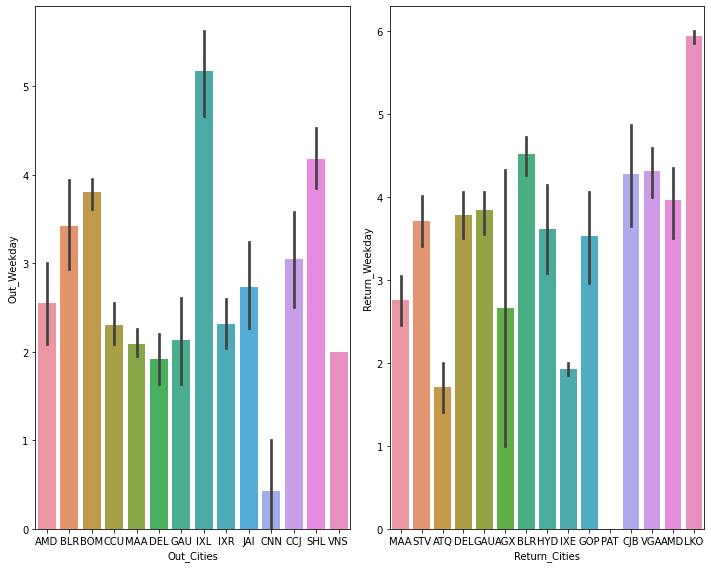

In [64]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.barplot(x='Out_Cities',y='Out_Weekday',data=data)
plt.subplot(1,2,2)
sns.barplot(x='Return_Cities',y='Return_Weekday',data=data)
plt.tight_layout()

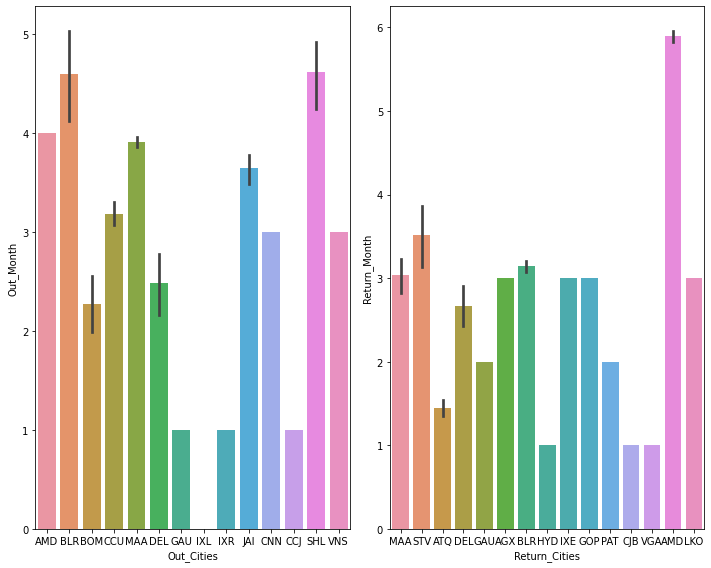

In [65]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.barplot(x='Out_Cities',y='Out_Month',data=data)
plt.subplot(1,2,2)
sns.barplot(x='Return_Cities',y='Return_Month',data=data)
plt.tight_layout()

<AxesSubplot:xlabel='Out_Cities', ylabel='Out_Day'>

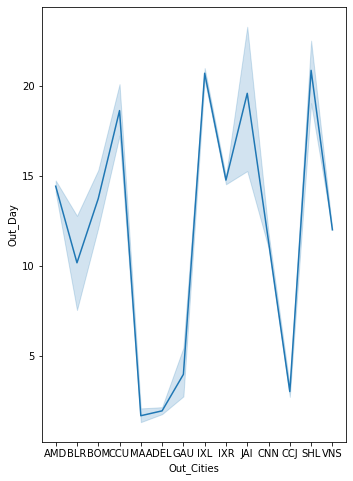

In [66]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.lineplot(x='Out_Cities',y='Out_Day',data=data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


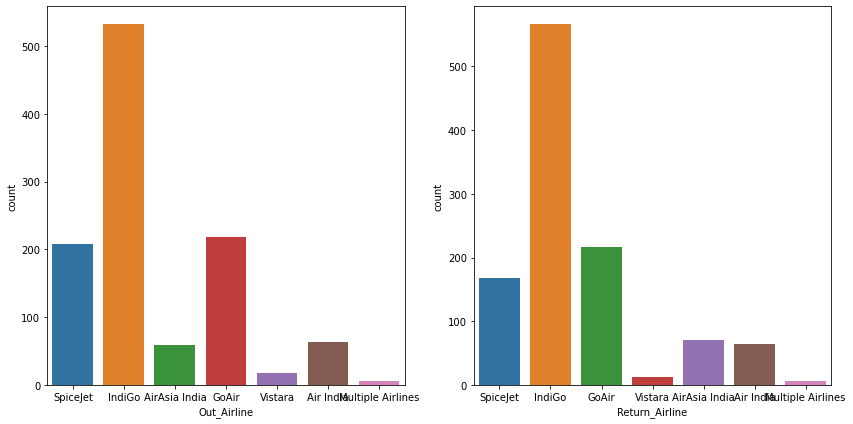

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data['Out_Airline'])
plt.subplot(1,2,2)
sns.countplot(data['Return_Airline'])
plt.tight_layout()

<AxesSubplot:xlabel='sort,Out_Airline'>

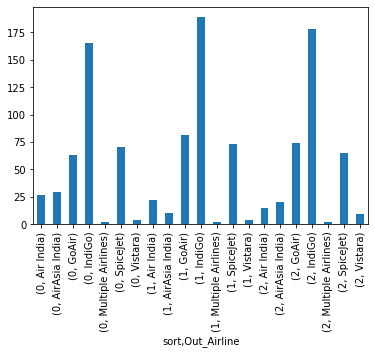

In [68]:
data.groupby(['sort','Out_Airline']).size().plot(kind='bar')

<AxesSubplot:xlabel='sort,Return_Airline'>

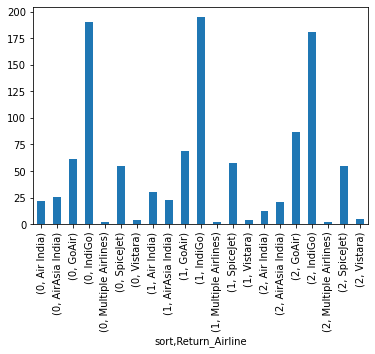

In [69]:
data.groupby(['sort','Return_Airline']).size().plot(kind='bar')

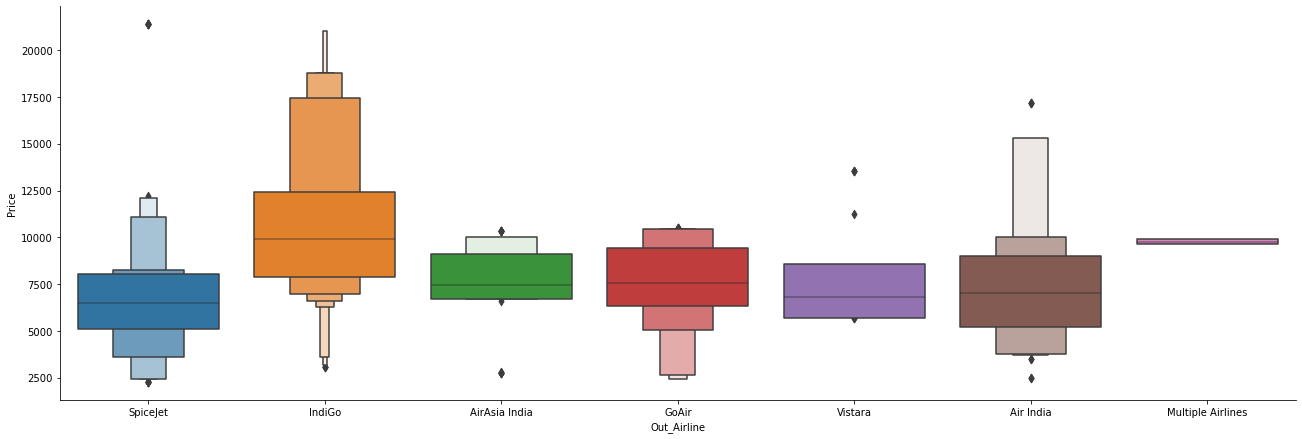

In [70]:
sns.catplot(x = "Out_Airline", y = "Price", data = data, kind="boxen", height = 6, aspect = 3)

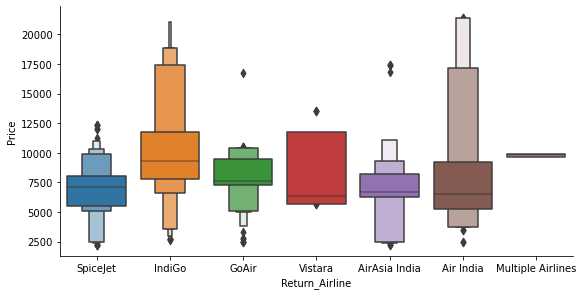

In [71]:
sns.catplot(x = "Return_Airline", y = "Price", data = data, kind="boxen", height = 4, aspect = 2)

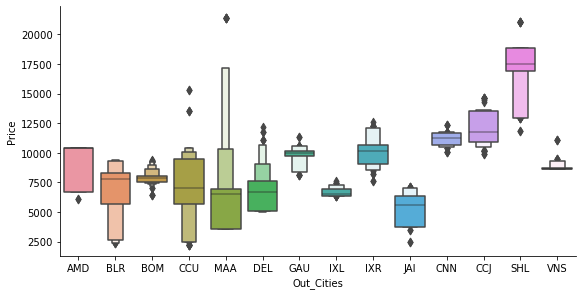

In [72]:
sns.catplot(x = "Out_Cities", y = "Price", data = data, kind="boxen", height = 4, aspect = 2)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be plac

<AxesSubplot:xlabel='Return_Cities', ylabel='Return_Airline'>

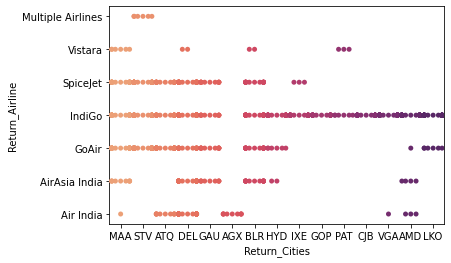

In [73]:
sns.swarmplot(x = "Return_Cities", y = "Return_Airline", data = data,palette='flare')

In [74]:
data.shape

(1104, 24)

In [75]:
data.drop(['O_T_1', 'O_T_2', 'R_T_1','R_T_2'],axis=1,inplace=True)

In [76]:
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Cities,Out_Airline,Return_Day,Return_Weekday,Return_Month,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins
0,15.0,2,4,AMD,SpiceJet,25,5,4,MAA,SpiceJet,1,1,BOM,BOM,6125.0,0,16,20,17,30
1,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BLR,BLR,6686.0,0,5,5,4,35
2,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,20
3,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,30
4,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,40


In [77]:
data.groupby(['Out_Stop_Cities','Return_Stop_Cities','Out_Journey_Type','Return_Journey_Type']).size()

Out_Stop_Cities  Return_Stop_Cities  Out_Journey_Type  Return_Journey_Type
BLR              BLR                 1                 1                       58
BOM              BOM                 1                 0                        3
                                                       1                       27
                                                       2                        2
CCU              CCU                 1                 1                      131
                                                       2                        4
                                                       3                        5
COK              COK                 1                 1                        9
DEL              DEL                 1                 0                       16
                                                       1                       54
                                                       2                        1
GOI              GOI   

In [78]:
#data['Out_Duration'] = ((data['Out_Hours']*60) + (data['Out_Mins']))

In [79]:
#data['Return_Duration'] = ((data['Return_Hours']*60) + (data['Return_Mins']))

In [80]:
#data.drop(['Out_Hours', 'Out_Mins', 'Return_Hours','Return_Mins'],axis=1,inplace=True)

In [81]:
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Cities,Out_Airline,Return_Day,Return_Weekday,Return_Month,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins
0,15.0,2,4,AMD,SpiceJet,25,5,4,MAA,SpiceJet,1,1,BOM,BOM,6125.0,0,16,20,17,30
1,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BLR,BLR,6686.0,0,5,5,4,35
2,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,20
3,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,30
4,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,40


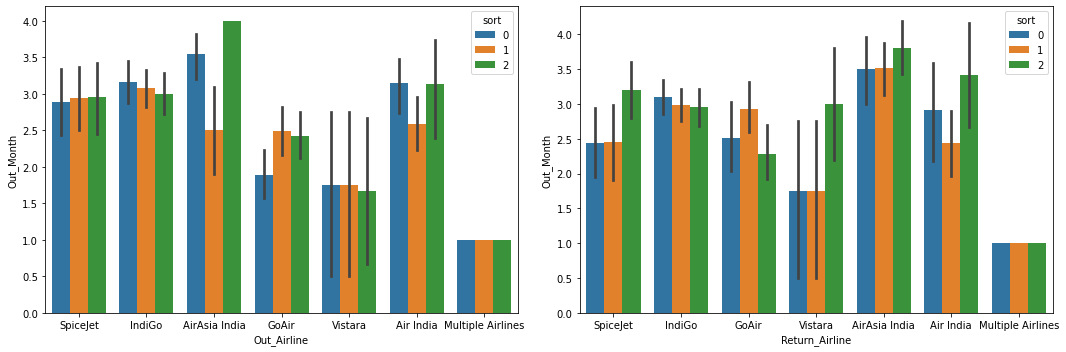

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y='Out_Month',x='Out_Airline',hue='sort',data=data)
plt.subplot(1,2,2)
sns.barplot(y='Out_Month',x='Return_Airline',hue='sort',data=data)
plt.tight_layout()

In [83]:
data.shape

(1104, 20)

In [84]:
sns.scatterplot(x='Out_Duration',y='Price',hue='sort',data=data,palette='flare')

ValueError: Could not interpret value `Out_Duration` for parameter `x`

In [ ]:
sns.scatterplot(x='Return_Duration',y='Price',hue='sort',data=data,palette='gist_rainbow')

In [ ]:
plt.subplot(1,2,1)
sns.scatterplot(x='Out_Journey_Type',y='Price',data=data)
plt.subplot(1,2,2)
sns.distplot(data.Out_Journey_Type,bins=5,kde=True)

plt.grid()
plt.legend()
plt.tight_layout()

No handles with labels found to put in legend.


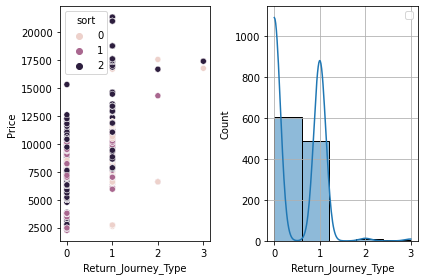

In [85]:
plt.subplot(1,2,1)
sns.scatterplot(x='Return_Journey_Type',y='Price',hue='sort',data=data)
plt.subplot(1,2,2)
sns.histplot(data.Return_Journey_Type,bins=5,kde=True)

plt.grid()
plt.legend()
plt.tight_layout()

In [86]:
Out_Airline = data[['Out_Airline']]

Out_Airline = pd.get_dummies(Out_Airline, drop_first = True)

Out_Airline.head()

,Out_Airline_AirAsia India,Out_Airline_GoAir,Out_Airline_IndiGo,Out_Airline_Multiple Airlines,Out_Airline_SpiceJet,Out_Airline_Vistara
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [87]:
Return_Airline = data[['Return_Airline']]

Return_Airline = pd.get_dummies(Return_Airline, drop_first = True)

Return_Airline.head()

,Return_Airline_AirAsia India,Return_Airline_GoAir,Return_Airline_IndiGo,Return_Airline_Multiple Airlines,Return_Airline_SpiceJet,Return_Airline_Vistara
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [88]:
Out_Cities = data[['Out_Cities']]

Out_Cities = pd.get_dummies(Out_Cities, drop_first = True)

Out_Cities.head()

,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCJ,Out_Cities_CCU,Out_Cities_CNN,Out_Cities_DEL,Out_Cities_GAU,Out_Cities_IXL,Out_Cities_IXR,Out_Cities_JAI,Out_Cities_MAA,Out_Cities_SHL,Out_Cities_VNS
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
Return_Cities = data[['Return_Cities']]

Return_Cities = pd.get_dummies(Return_Cities, drop_first = True)

Return_Cities.head()

,Return_Cities_AMD,Return_Cities_ATQ,Return_Cities_BLR,Return_Cities_CJB,Return_Cities_DEL,Return_Cities_GAU,Return_Cities_GOP,Return_Cities_HYD,Return_Cities_IXE,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_PAT,Return_Cities_STV,Return_Cities_VGA
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [90]:
#Out_Stop_Cities = data[['Out_Stop_Cities']]

#Out_Stop_Cities = pd.get_dummies(Out_Stop_Cities, drop_first = True)

#Out_Stop_Cities.head()

In [91]:
#Return_Stop_Cities = data[['Return_Stop_Cities']]

#Return_Stop_Cities = pd.get_dummies(Return_Stop_Cities, drop_first = True)

#Return_Stop_Cities.head()

In [92]:
Clean_data = pd.concat([data, Out_Airline, Return_Airline, Out_Cities, Return_Cities], axis = 1)

In [93]:
Clean_data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Cities,Out_Airline,Return_Day,Return_Weekday,Return_Month,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins,Out_Airline_AirAsia India,Out_Airline_GoAir,Out_Airline_IndiGo,Out_Airline_Multiple Airlines,Out_Airline_SpiceJet,Out_Airline_Vistara,Return_Airline_AirAsia India,Return_Airline_GoAir,Return_Airline_IndiGo,Return_Airline_Multiple Airlines,Return_Airline_SpiceJet,Return_Airline_Vistara,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCJ,Out_Cities_CCU,Out_Cities_CNN,Out_Cities_DEL,Out_Cities_GAU,Out_Cities_IXL,Out_Cities_IXR,Out_Cities_JAI,Out_Cities_MAA,Out_Cities_SHL,Out_Cities_VNS,Return_Cities_AMD,Return_Cities_ATQ,Return_Cities_BLR,Return_Cities_CJB,Return_Cities_DEL,Return_Cities_GAU,Return_Cities_GOP,Return_Cities_HYD,Return_Cities_IXE,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_PAT,Return_Cities_STV,Return_Cities_VGA
0,15.0,2,4,AMD,SpiceJet,25,5,4,MAA,SpiceJet,1,1,BOM,BOM,6125.0,0,16,20,17,30,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BLR,BLR,6686.0,0,5,5,4,35,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,30,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15.0,2,4,AMD,IndiGo,25,5,4,MAA,IndiGo,1,1,BOM,BOM,6686.0,0,4,30,5,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
Clean_data.drop(['Out_Airline', 'Return_Airline', 'Out_Cities', 'Return_Cities', 'Out_Stop_Cities', 'Return_Stop_Cities'], axis = 1, inplace = True)

In [95]:
Clean_data.shape

(1104, 53)

In [96]:
Clean_data.head()

,Out_Day,Out_Weekday,Out_Month,Return_Day,Return_Weekday,Return_Month,Out_Journey_Type,Return_Journey_Type,Price,sort,Out_Hours,Out_Mins,Return_Hours,Return_Mins,Out_Airline_AirAsia India,Out_Airline_GoAir,Out_Airline_IndiGo,Out_Airline_Multiple Airlines,Out_Airline_SpiceJet,Out_Airline_Vistara,Return_Airline_AirAsia India,Return_Airline_GoAir,Return_Airline_IndiGo,Return_Airline_Multiple Airlines,Return_Airline_SpiceJet,Return_Airline_Vistara,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCJ,Out_Cities_CCU,Out_Cities_CNN,Out_Cities_DEL,Out_Cities_GAU,Out_Cities_IXL,Out_Cities_IXR,Out_Cities_JAI,Out_Cities_MAA,Out_Cities_SHL,Out_Cities_VNS,Return_Cities_AMD,Return_Cities_ATQ,Return_Cities_BLR,Return_Cities_CJB,Return_Cities_DEL,Return_Cities_GAU,Return_Cities_GOP,Return_Cities_HYD,Return_Cities_IXE,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_PAT,Return_Cities_STV,Return_Cities_VGA
0,15.0,2,4,25,5,4,1,1,6125.0,0,16,20,17,30,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,15.0,2,4,25,5,4,1,1,6686.0,0,5,5,4,35,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15.0,2,4,25,5,4,1,1,6686.0,0,4,30,5,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,15.0,2,4,25,5,4,1,1,6686.0,0,4,30,5,30,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15.0,2,4,25,5,4,1,1,6686.0,0,4,30,5,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [97]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1156
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Out_Day                           1104 non-null   float64
 1   Out_Weekday                       1104 non-null   int32  
 2   Out_Month                         1104 non-null   int32  
 3   Return_Day                        1104 non-null   int64  
 4   Return_Weekday                    1104 non-null   int32  
 5   Return_Month                      1104 non-null   int32  
 6   Out_Journey_Type                  1104 non-null   int64  
 7   Return_Journey_Type               1104 non-null   int64  
 8   Price                             1104 non-null   float64
 9   sort                              1104 non-null   int32  
 10  Out_Hours                         1104 non-null   int64  
 11  Out_Mins                          1104 non-null   int64  
 12  Return

In [98]:
Clean_data.corr()['Price'].sort_values(ascending=False)

Price                               1.000000
Out_Cities_SHL                      0.708223
Return_Hours                        0.706116
Return_Cities_AMD                   0.705911
Out_Hours                           0.553845
Out_Journey_Type                    0.551236
Return_Journey_Type                 0.521969
Out_Airline_IndiGo                  0.457202
Return_Month                        0.414193
Return_Airline_IndiGo               0.334219
Out_Month                           0.260107
Out_Weekday                         0.216368
Out_Cities_CCJ                      0.198151
Return_Day                          0.179230
Out_Day                             0.164122
Out_Mins                            0.163665
Return_Cities_CJB                   0.143181
Return_Mins                         0.123374
Return_Cities_IXE                   0.116699
Out_Cities_CNN                      0.116699
sort                                0.106936
Return_Cities_HYD                   0.059886
Out_Cities

In [99]:
X = Clean_data.drop(['Price'],axis=1).values
y = Clean_data['Price'].values

In [100]:
SC = StandardScaler()
X = SC.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [102]:
svr_model = SVR(kernel='linear', gamma='scale', C=40, epsilon=0.1, shrinking=True)
svr_model.fit(X_train,y_train)

SVR(C=40, kernel='linear')

In [103]:
svr_predict = svr_model.predict(X_test)

In [104]:
n = len(X_test)
k = X_test.shape[1]

r2 = r2_score(y_test,svr_predict)
adj_r2 = 1 - (1 - r2)*(n-1)/(n-k-1)
MAE = mean_absolute_error(y_test,svr_predict)
MAPE = np.mean(np.abs((y_test-svr_predict)/y_test))*100
MSE = mean_squared_error(y_test,svr_predict)
RMSE = np.sqrt(MSE)

print(tabulate([['RMSE',RMSE],['MSE',MSE],['MAPE',MAPE],['MAE',MAE],['r2',r2],['adj_r2',adj_r2]],
               tablefmt='rst',numalign='left'))

======  ===========
RMSE    1876.79
MSE     3.52236e+06
MAPE    10.5442
MAE     952.247
r2      0.766505
adj_r2  0.694233
======  ===========


In [105]:
svr_train = svr_model.score(X_train,y_train)
svr_test = svr_model.score(X_test,y_test)

print("/n SVR train score", svr_train)
print("/n SVR test score", svr_test)

/n SVR train score 0.8116413748250876
/n SVR test score 0.7665053267668357


In [106]:
#param_grid = {'C': [0.1, 1], 'gamma': [1, .1]}
#grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, verbose=4)
#grid.fit(X_train, y_train)

#grid.best_params_  # This gives the best model as c and gamma value

#grid_predict = grid.predict(X_test)
#grid_predict

In [107]:
#svr_train = grid.score(X_train,y_train)
#svr_test = grid.score(X_test,y_test)

#print("SVR grid train score", svr_train*100)
#print("SVR grid test score", svr_test*100)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

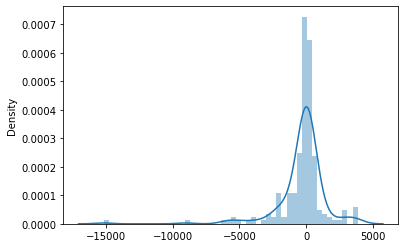

In [108]:
sns.distplot(svr_predict-y_test)

In [109]:
from sklearn.neighbors import KNeighborsRegressor

In [110]:
knr_model = KNeighborsRegressor(n_neighbors=9,n_jobs=9) 
knr_model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=9, n_neighbors=9)

In [111]:
knr_predict = knr_model.predict(X_test)

In [112]:
n = len(X_test)
k = X_test.shape[1]

r2 = r2_score(y_test,knr_predict)
adj_r2 = 1 - (1 - r2)*(n-1)/(n-k-1)
MAE = mean_absolute_error(y_test,knr_predict)
MAPE = np.mean(np.abs((y_test-knr_predict)/y_test))*100
MSE = mean_squared_error(y_test,knr_predict)
RMSE = np.sqrt(MSE)

print(tabulate([['RMSE',RMSE],['MSE',MSE],['MAPE',MAPE],['MAE',MAE],['r2',r2],['adj_r2',adj_r2]],
               tablefmt='rst',numalign='left'))

======  ===========
RMSE    1010.12
MSE     1.02033e+06
MAPE    5.32905
MAE     499.933
r2      0.932363
adj_r2  0.911427
======  ===========


In [113]:
knr_train = knr_model.score(X_train,y_train)
knr_test = knr_model.score(X_test,y_test)

print("KNR train score", knr_train*100,'%')
print("KNR test score", knr_test*100,'%')

KNR train score 95.62877237588059 %
KNR test score 93.23627845813094 %


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

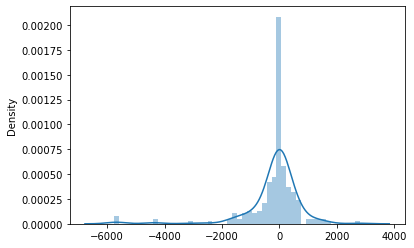

In [114]:
sns.distplot(knr_predict-y_test)

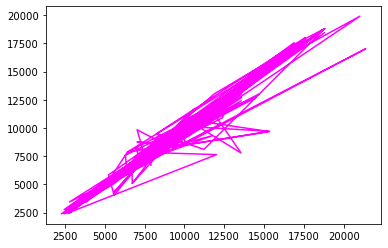

In [115]:
plt.plot(y_test,knr_predict,color='magenta')

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(f'Linear Regression Coeff m : {lin_reg.coef_}')
print(f'Linear Regression Intercept c : {lin_reg.intercept_}')

Linear Regression Coeff m : [ -138.37250925   -64.64529804  -240.8886804   -319.00613139
   119.2909416   3348.71915313  -178.75129294  -303.324214
   293.8646568   -193.55060018  -148.65086893   -11.88346637
   104.79175808    25.20185589   -45.02616275   -17.41900727
   -18.02890119   -29.31761069    47.17562015   -94.19895728
  -144.34806581   -50.63221352   -18.02890119   -54.6784892
   262.596547    -457.89552504  -924.38402424   520.30281913
   231.61097698  -934.71540962   992.63433846  1876.81534635
   908.77974571  -841.12170784  -450.63098752  -166.82897729
   152.2028701  -1253.16672001 -2148.37708501 -2292.94584342
 -4983.19690833 -1415.82046339 -5665.11529157 -3624.36616043
 -2208.86527895  -841.12170784  -934.71540962 -1253.16672001
 -4288.07284241 -1199.12131487 -6410.77013151 -1906.78181173]
Linear Regression Intercept c : 8915.001253945868


In [118]:
lin_reg_predict = lin_reg.predict(X_test)

In [119]:
n = len(X_test)
k = X_test.shape[1]

r2 = r2_score(y_test,lin_reg_predict)
adj_r2 = 1 - (1 - r2)*(n-1)/(n-k-1)
MAE = mean_absolute_error(y_test,lin_reg_predict)
MAPE = np.mean(np.abs((y_test-lin_reg_predict)/y_test))*100
MSE = mean_squared_error(y_test,lin_reg_predict)
RMSE = np.sqrt(MSE)

print(tabulate([['RMSE',RMSE],['MSE',MSE],['MAPE',MAPE],['MAE',MAE],['r2',r2],['adj_r2',adj_r2]],
               tablefmt='rst',numalign='left'))

lin_reg_train = lin_reg.score(X_train,y_train)
lin_reg_test = lin_reg.score(X_test,y_test)

print("lin_reg train score", lin_reg_train*100,'%')
print("lin_reg test score", lin_reg_test*100,'%')

======  ===========
RMSE    1187.62
MSE     1.41043e+06
MAPE    9.58179
MAE     804.443
r2      0.906503
adj_r2  0.877564
======  ===========
lin_reg train score 93.7965363214139 %
lin_reg test score 90.65034599797463 %


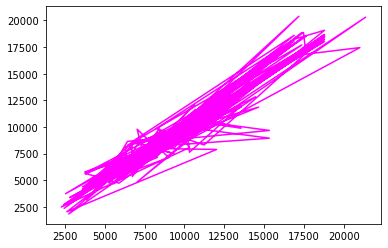

In [120]:
plt.plot(y_test,lin_reg_predict,color='magenta')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

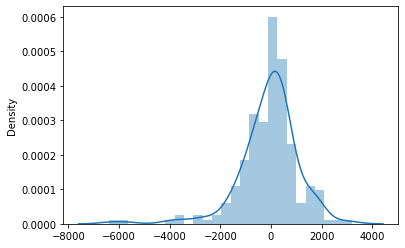

In [121]:
sns.distplot(lin_reg_predict-y_test)

In [122]:
import pickle
file='knr_FlightPrice_1.pkl' #open a file where you want to store the data
pickle.dump(knr_model,open(file,'wb'))